In [2]:
import pandas as pd

accidents_df = pd.read_csv('US_Accidents_Dec19.csv')

us_df = accidents_df[0:1000]

us_df.to_csv('us_df_sampled.csv')

In [3]:
accidents_df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
2974331,A-2974355,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# making new data frame with dropped NA values
new_data = accidents_df.dropna(axis = 0, how ='any')

# comparing sizes of data frames
print("Old data frame length:", len(accidents_df), "\nNew data frame length:", 
      len(new_data), "\nNumber of rows with at least 1 NA value: ", (len(accidents_df)-len(new_data)))

Old data frame length: 2974335 
New data frame length: 0 
Number of rows with at least 1 NA value:  2974335


In [6]:
# checking which column contains at least one nan value
nan_cols = [i for i in accidents_df.columns if accidents_df[i].isnull().any()]
print (nan_cols)

['TMC', 'End_Lat', 'End_Lng', 'Description', 'Number', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [7]:
# which columns have more than a 50% of nan values
nan_cols50 = [i for i in accidents_df.columns if accidents_df[i].isnull().sum() > 0.50*len(accidents_df)]
print (nan_cols50)

['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']


In [8]:
# view by columns
percent_missing = accidents_df.isnull().sum() * 100 / len(accidents_df)
print (percent_missing.sort_values(ascending = False))

End_Lng                  75.521554
End_Lat                  75.521554
Precipitation(in)        67.186716
Number                   64.471722
Wind_Chill(F)            62.286965
TMC                      24.478446
Wind_Speed(mph)          14.821464
Weather_Condition         2.216697
Visibility(mi)            2.208595
Humidity(%)               1.989453
Temperature(F)            1.884892
Pressure(in)              1.618580
Wind_Direction            1.516339
Weather_Timestamp         1.234057
Airport_Code              0.191337
Timezone                  0.106343
Zipcode                   0.029586
Sunrise_Sunset            0.003127
Civil_Twilight            0.003127
Nautical_Twilight         0.003127
Astronomical_Twilight     0.003127
City                      0.002791
Description               0.000034
Country                   0.000000
Junction                  0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Turning_Loop        

In [9]:
# how many columns are there in the data frame
col_count = accidents_df.shape[1]
col_count

49

In [10]:
# removing completely all columns with more than 50% nan rows
accidents_df.drop(nan_cols50, inplace=True, axis=1)

In [11]:
# count data frame columns after removing
col_count = accidents_df.shape[1]
col_count

44

In [12]:
# making new data frame with dropped NA values
new_df = accidents_df.dropna(axis = 0, how ='any')

# comparing sizes of data frames
print("Old data frame length:", len(accidents_df), "\nNew data frame length:", 
      len(new_df), "\nNumber of rows with at least 1 NA value: ", (len(accidents_df)-len(new_df)))

Old data frame length: 2974335 
New data frame length: 1886978 
Number of rows with at least 1 NA value:  1087357


In [13]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Humidity(%)            float64
 22  Pressure(in)      

In [14]:
us_df = accidents_df[0:1000]
us_df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A-996,MapQuest,201.0,2,2016-06-23 10:31:07,2016-06-23 11:01:07,38.022778,-121.965698,0.00,#4 lane blocked due to accident on CA-4 Westbo...,...,False,False,False,False,False,False,Day,Day,Day,Day
996,A-997,MapQuest,201.0,3,2016-06-23 10:22:09,2016-06-23 10:52:09,37.656654,-121.901588,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
997,A-998,MapQuest,201.0,2,2016-06-23 10:31:51,2016-06-23 11:46:51,38.690273,-121.392136,0.00,Accident on County Hwy-E14 Elkhorn Blvd at 32n...,...,False,False,False,False,False,False,Day,Day,Day,Day
998,A-999,MapQuest,201.0,2,2016-06-23 10:32:51,2016-06-23 11:47:51,38.681110,-121.333244,0.00,Accident on County Hwy-E14 Greenback Ln at Gar...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
# Find the state that has the most accidents
states_by_accident = accidents_df.State.value_counts()
states_by_accident[:1]

CA    663204
Name: State, dtype: int64

In [16]:
# Find the state that has the most number of most severe accidents
accidents_df[accidents_df['Severity'] == 4].groupby(['State'])['Severity'].count().sort_values(ascending=False)[0:1]

State
FL    7422
Name: Severity, dtype: int64

In [17]:
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')

In [18]:
#Find the most common hour at which accidents have occurred
import datetime as dt
#accidents_df.Start_Time
#accidents_df['Start_Time'].dt.hour
print("All hours and accidents:", accidents_df['Start_Time'].dt.hour.value_counts())
print("The most common hour for accidient is at:",accidents_df['Start_Time'].dt.hour.value_counts().idxmax(), "o'clock")

All hours and accidents: 8     284274
7     273506
17    221641
16    212576
15    177655
9     177468
6     169079
18    167411
10    157867
11    155330
14    150242
13    142027
12    139166
19    115413
5      83866
20     81733
21     57739
4      53594
22     48299
23     26716
0      23189
2      18944
3      18600
1      18000
Name: Start_Time, dtype: int64
The most common hour for accidient is at: 8 o'clock


In [19]:
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')
accidents_df['End_Time'] = pd.to_datetime(accidents_df['End_Time'], errors='coerce')

In [38]:
#Find the average duration of an accident
import datetime as dt
accidents_df['End_Time'].dt.hour.mean() - accidents_df['Start_Time'].dt.hour.mean()
print("The average duration of an accident is:",accidents_df['End_Time'].dt.hour.mean() - accidents_df['Start_Time'].dt.hour.mean(),'hours')

The average duration of an accident is: 0.8395426204512937 hours


In [133]:
import datetime
df_years = accidents_df['Start_Time'].dt.year
accidents_df["Year"] = df_years  #adding a year column to be able to use it in filtering
accidents_df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,Night,Night,Night,Day,2016
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,True,False,Night,Night,Day,Day,2016
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,Night,Day,Day,Day,2016
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,True,False,Day,Day,Day,Day,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2019
2974331,A-2974355,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2019
2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,Day,Day,Day,Day,2019
2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2019


In [187]:
#Find the average number of yearly accidents per city
yearly_accidents_per_city=accidents_df[accidents_df['Year'] < 2021].groupby(['Year','City'])['ID'].count()
print (yearly_accidents_per_city)

Year  City         
2015  Toledo            1
2016  Abbeville        32
      Abbotsford        1
      Abbott            5
      Abbottstown      11
                       ..
2020  Detroit           2
      Irvington         1
      Louisville        1
      Mechanicville     1
      Suitland          1
Name: ID, Length: 34200, dtype: int64


In [190]:
#Adding column "Date" for the purpose of visualization
import datetime
df_date = accidents_df['Start_Time'].dt.date
accidents_df["Date"] = df_date  #adding a year column to be able to use it in filtering
accidents_df["Date"]

0          2016-02-08
1          2016-02-08
2          2016-02-08
3          2016-02-08
4          2016-02-08
              ...    
2974330    2019-08-23
2974331    2019-08-23
2974332    2019-08-23
2974333    2019-08-23
2974334    2019-08-23
Name: Date, Length: 2974335, dtype: object

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

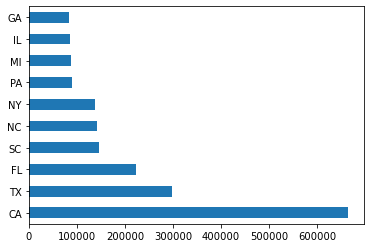

In [216]:
#plot the states by accidents
states_by_accident [:10].plot(kind = 'barh')

In [256]:
#pull out the column
accidents_df.City  

#look at the unique values of the column
accidents_df.City.unique()

yearly_accidents_per_city = accidents_df.City.value_counts()
yearly_accidents_per_city

Houston                         93289
Charlotte                       68054
Los Angeles                     65851
Austin                          58703
Dallas                          58036
                                ...  
Amherst Junction                    1
Miller                              1
Glenwood Landing                    1
New Roads                           1
American Fork-Pleasant Grove        1
Name: City, Length: 11685, dtype: int64

<AxesSubplot:>

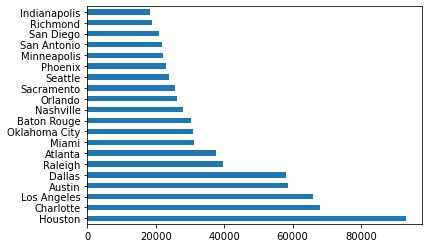

In [257]:
yearly_accidents_per_city[:20].plot(kind = 'barh')

In [260]:
high_accident_cities = yearly_accidents_per_city[yearly_accidents_per_city >= 1000]
low_accident_cities = yearly_accidents_per_city[yearly_accidents_per_city < 1000]
len(high_accident_cities)/len(yearly_accidents_per_city)

0.04278990158322636

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

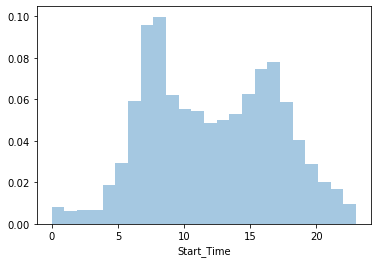

In [221]:
#plot the distribution (by hours)
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

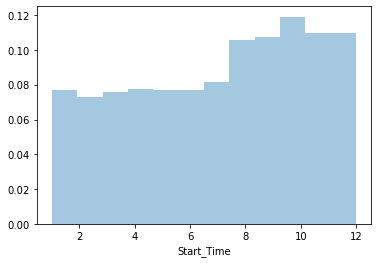

In [222]:
#plot for months
sns.distplot(df.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(F)'>

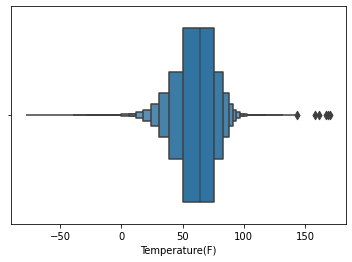

In [223]:
#by temperature (in °F)
accidents_df['Temperature(F)'].value_counts()
sns.boxenplot(accidents_df['Temperature(F)'])

In [226]:
accidents_df.Weather_Condition.value_counts()

Clear                        808171
Mostly Cloudy                412528
Overcast                     382480
Fair                         335289
Partly Cloudy                295439
                              ...  
Snow and Thunder                  1
Widespread Dust / Windy           1
Light Snow Shower                 1
Light Rain Shower / Windy         1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 120, dtype: int64

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

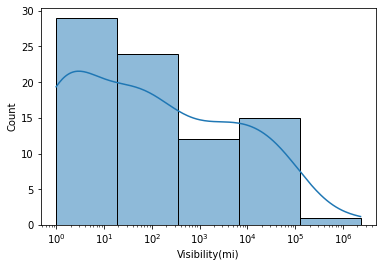

In [233]:
sns.histplot(accidents_df['Visibility(mi)'].value_counts(), bins= 5, kde=True, log_scale=True)

<AxesSubplot:ylabel='Crossing'>

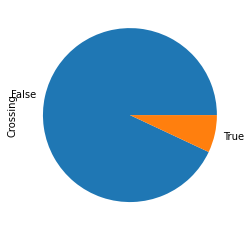

In [234]:
accidents_df['Crossing'].value_counts().plot(kind= 'pie')

<AxesSubplot:ylabel='Traffic_Signal'>

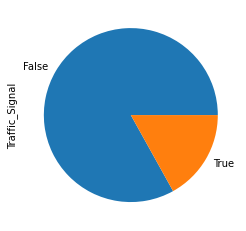

In [251]:
accidents_df['Traffic_Signal'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Bump'>

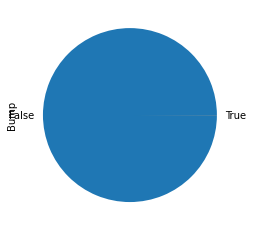

In [252]:
accidents_df['Bump'].value_counts().plot(kind='pie')

### Insights and Conclusion

The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:
- The top 3 states by accidents include populous ones like California, Texas, and Florida.
- Less than 5% (~ 4.27%) of cities have more than 1000 accidents in the period between January 2016 and December 2020.
- The highest peak during the day is the time when the most accidents have occured, when people are usually goint to work and are back from work.
- In the last quarter most of the accidents have been occured.
  The weather conditions seem to be “Clear", "Mostly Cloudy" and "Overcast” in most cases. 
- Most accidents happened away from the main crossing where there was inadequate or absence of traffic management infrastructures like traffic signaling systems and speed bumps.